# Import Necessary library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

C:\Users\errah\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Reading the Data

In [2]:
df = pd.read_csv("IRIS.csv")

# Explore the Data

In [3]:
print("Shape of the dataset:", df.shape)
print("First few rows of the dataset:")
print(df.head())
print("Last few rows of the dataset:")
print(df.tail())
print("Information about the dataset:")
print(df.info())
print("Descriptive statistics of the dataset:")
print(df.describe())
print("Number of duplicated rows:", df.duplicated().sum())
print("Number of missing values in each column:")
print(df.isna().sum())

Shape of the dataset: (150, 5)
First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Last few rows of the dataset:
     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica
Information about the dataset:
<class 'pandas.core

# Cleaning the Data

In [4]:
df.drop_duplicates(inplace=True)
print("After dropping duplicates, new shape of the dataset:", df.shape)

After dropping duplicates, new shape of the dataset: (147, 5)


# Data for the doughnut chart

In [6]:
# Calculate the value counts for the 'species' column
value_count = df['species'].value_counts()

# Extracting labels, sizes, and colors for the doughnut chart
labels = value_count.index
sizes = value_count.values
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Now you can proceed to create the doughnut chart using labels, sizes, and colors


# Creation of the donut chart

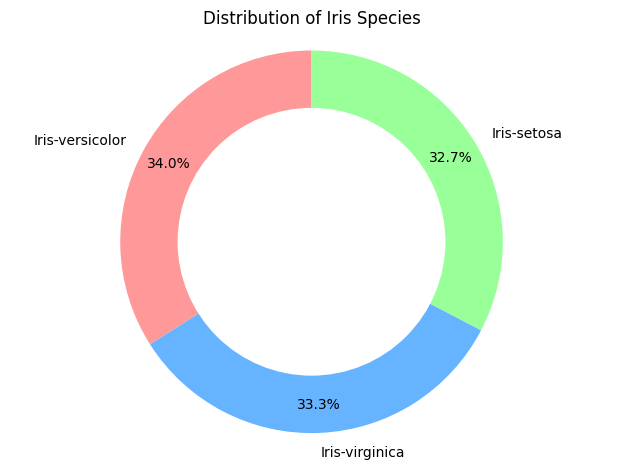

In [7]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Distribution of Iris Species')

# Ensure the donut chart is a circle
plt.axis('equal')

# Show chart
plt.tight_layout()
plt.show()


# Visualization of Sepal Length vs Sepal Width

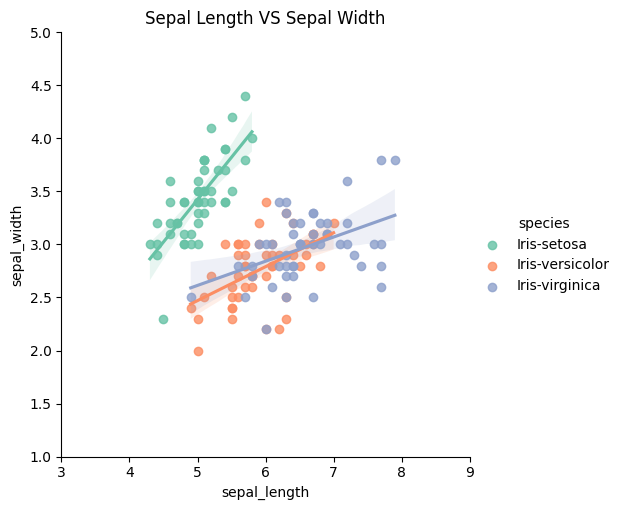

In [8]:
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", palette="Set2", data=df)
plt.title("Sepal Length VS Sepal Width")
plt.xlim(3, 9)  # Adjust x-axis scale
plt.ylim(1, 5)  # Adjust y-axis scale
plt.show()

# Visualization of Petal Length vs Petal Width

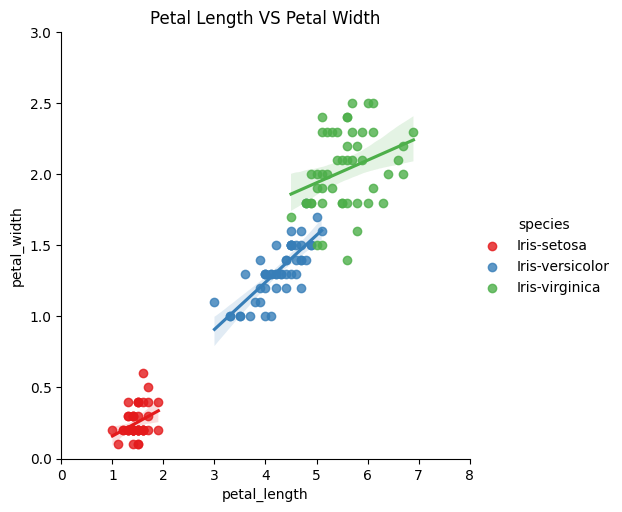

In [9]:
sns.lmplot(x="petal_length", y="petal_width", hue="species", palette="Set1", data=df)
plt.title("Petal Length VS Petal Width")
plt.xlim(0, 8)  
plt.ylim(0, 3) 
plt.show()


# Splitting the Data

In [10]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
X = df.drop(columns='species')
Y = df['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

# Visualization the relation between the columns using correlation

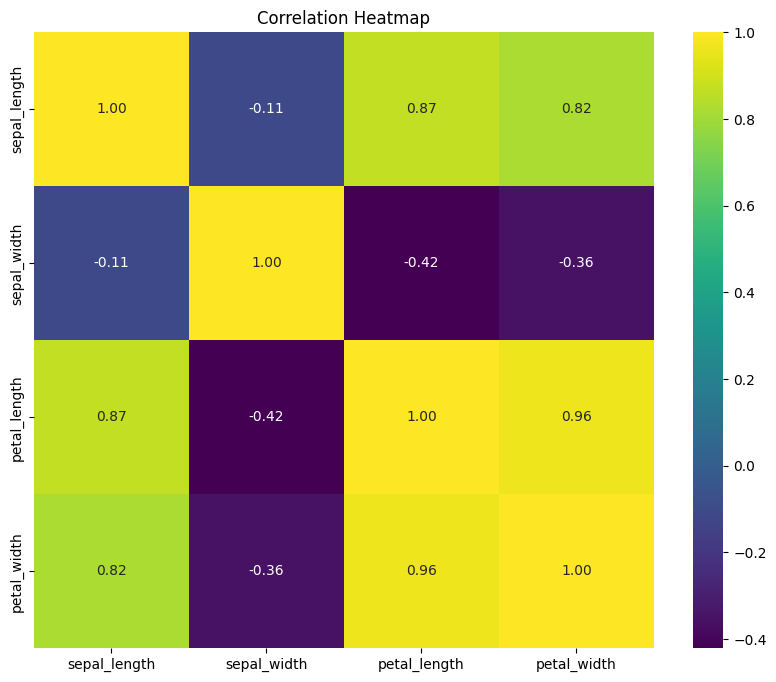

In [11]:
df_corr = df.drop(columns='species', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Logistic Regression Model

In [12]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
print("Accuracy on the test set:", log_model.score(X_test, Y_test))
print("Accuracy on the training set:", log_model.score(X_train, Y_train))

Accuracy on the test set: 1.0
Accuracy on the training set: 0.9743589743589743


# Prediction example

In [13]:
sample_data = [[5.1, 3.5, 1.4, 0.2]]  # Example data for prediction
print("Predicted species:", label_encoder.inverse_transform(log_model.predict(sample_data)))


Predicted species: ['Iris-setosa']


C:\Users\errah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Logistic Regression Model

In [14]:
log_model = LogisticRegression()
log_model.fit(X_train, Y_train)
print("Accuracy on the test set:", log_model.score(X_test, Y_test))
print("Accuracy on the training set:", log_model.score(X_train, Y_train))


Accuracy on the test set: 1.0
Accuracy on the training set: 0.9743589743589743


# Prediction example

In [15]:
sample_data = [[5.1, 3.5, 1.4, 0.2]]  # Example data for prediction
print("Predicted species:", label_encoder.inverse_transform(log_model.predict(sample_data)))

Predicted species: ['Iris-setosa']


C:\Users\errah\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
